In [2]:
import pandas as pd

In [3]:
trns = pd.read_csv('C:/Users/Animesh.Porwal/Downloads/walmart_data.txt')
trns

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [4]:
trns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
trns.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There are no missing values in the data

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
trns.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [8]:
trns['Product_Category'].value_counts(normalize = 'True')*100

5     27.438971
1     25.520118
8     20.711076
11     4.415272
2      4.338373
6      3.720631
3      3.674637
4      2.136645
16     1.786688
15     1.143495
13     1.008784
10     0.931703
12     0.717548
7      0.676462
18     0.568112
20     0.463579
19     0.291419
14     0.276875
17     0.105078
9      0.074536
Name: Product_Category, dtype: float64

### Most popular product categories are 5 and 1 accounting for nearly 50% of all purchases

In [9]:
trns.groupby('Product_Category')['Purchase'].mean()

Product_Category
1     13606.218596
2     11251.935384
3     10096.705734
4      2329.659491
5      6240.088178
6     15838.478550
7     16365.689600
8      7498.958078
9     15537.375610
10    19675.570927
11     4685.268456
12     1350.859894
13      722.400613
14    13141.625739
15    14780.451828
16    14766.037037
17    10170.759516
18     2972.864320
19       37.041797
20      370.481176
Name: Purchase, dtype: float64

### Although, category 10 has the highest purchase value, cateogory 1 stays to be the most imp category since it's the highest sold as well as among high average purchase value

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

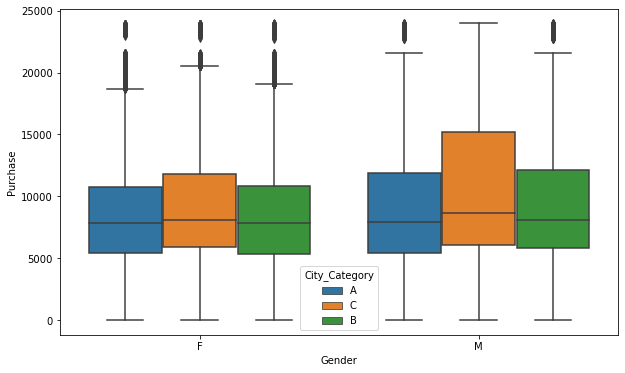

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='Purchase', hue='City_Category', data=trns)

### Product Purchase mean lies around 9200, however median lies around 7500 which means that the distribution is slightly skewed towards left

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

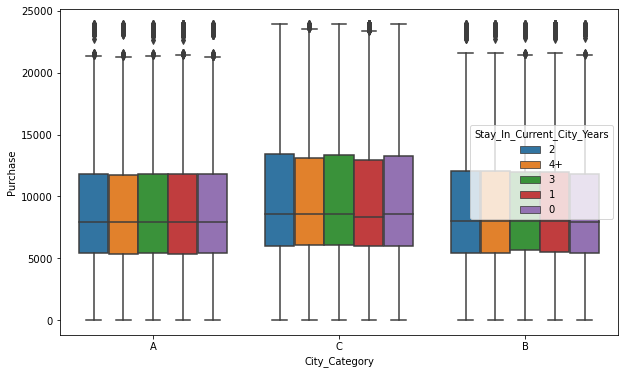

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='City_Category', y='Purchase', hue='Stay_In_Current_City_Years', data=trns)

<AxesSubplot:>

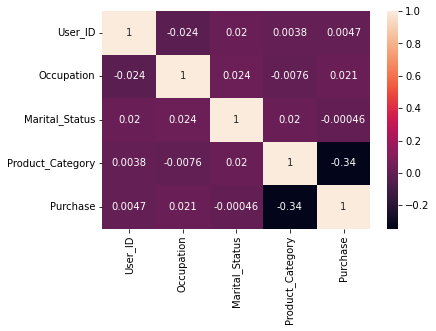

In [12]:
sns.heatmap(trns.corr(),annot = True)

### There is no clear correlation between any of the dimensions

In [13]:
trns.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


### Female mean for the sample looks to be lower in comparison to the male mean for the sample

In [14]:
# For 5 million customers in Males or Females
female_sample_mean = 8734
female_std = 4767
male_sample_mean = 9437
male_std = 5092
n = 5000000

In [15]:
std_error_male = male_sample_mean/n**0.5
std_error_female = female_sample_mean/n**0.5
std_error_male, std_error_female

(4.220354700733103, 3.9059635430966324)

### CLT Calculations for standard errors show a higher standard error for male population. Next, let's try bootstrapping the sample and checking for population mean

In [16]:
import numpy as np

<AxesSubplot:ylabel='Count'>

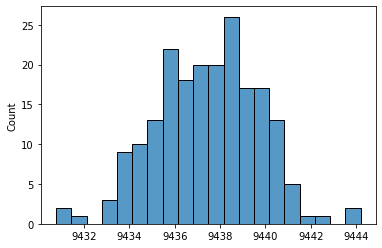

In [23]:
## Bootstrapping for male population
sample_means_male, n = [], 5000000
for reps in range(200):
  bootstrapped_sample = np.random.choice(trns[trns['Gender'] == 'M']['Purchase'], size=n) 
  bootstrapped_mean = np.mean(bootstrapped_sample)
  sample_means_male.append(bootstrapped_mean)
sns.histplot(sample_means_male, bins=20)

<AxesSubplot:ylabel='Count'>

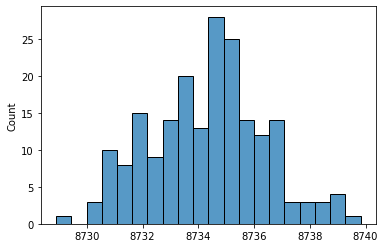

In [24]:
## Bootstrapping for female population
sample_means_female, n = [], 5000000
for reps in range(200):
  bootstrapped_sample = np.random.choice(trns[trns['Gender'] == 'F']['Purchase'], size=n) 
  bootstrapped_mean = np.mean(bootstrapped_sample)
  sample_means_female.append(bootstrapped_mean)
sns.histplot(sample_means_female, bins=20)

## 95% confidence intervals for male and female population

In [25]:
print("Male - ",np.round(np.percentile(sample_means_male, [2.5, 97.5]))) #male
print("Female - ",np.round(np.percentile(sample_means_female, [2.5, 97.5]))) #female

Male -  [9433. 9441.]
Female -  [8731. 8739.]


## 99% confidence intervals for male and female population

In [26]:
print("Male - ",np.round(np.percentile(sample_means_male, [0.5, 99.5]))) #male
print("Female - ",np.round(np.percentile(sample_means_female, [0.5, 99.5]))) #female

Male -  [9431. 9444.]
Female -  [8730. 8739.]


### There is no overlap between Male and female purchases, and clearly with 99% confidence, we can say Males tend to spend more than women

# Married vs Unmarried

In [27]:
trns.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [30]:
unmarried_sample_mean = 8734
unmarried_std = 4767
married_sample_mean = 9437
married_std = 5092
n = 5000000

In [31]:
std_error_married = married_sample_mean/n**0.5
std_error_unmarried = unmarried_sample_mean/n**0.5
std_error_married, std_error_unmarried

(4.220354700733103, 3.9059635430966324)

### CLT Calculations for standard errors show a higher standard error for married population. Next, let's try bootstrapping the sample and checking for population mean


<AxesSubplot:ylabel='Count'>

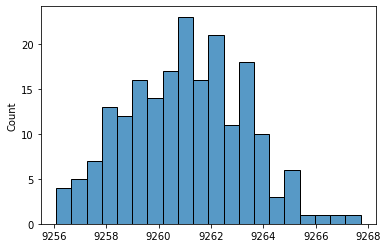

In [38]:
## Bootstrapping for married population
sample_means_married, n = [], 5000000
for reps in range(200):
  bootstrapped_sample = np.random.choice(trns[trns['Marital_Status'] == 1]['Purchase'], size=n) 
  bootstrapped_mean = np.mean(bootstrapped_sample)
  sample_means_married.append(bootstrapped_mean)
sns.histplot(sample_means_married, bins=20)

<AxesSubplot:ylabel='Count'>

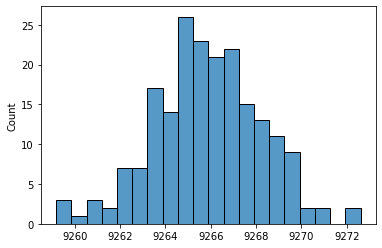

In [39]:
## Bootstrapping for unmarried population
sample_means_unmarried, n = [], 5000000
for reps in range(200):
  bootstrapped_sample = np.random.choice(trns[trns['Marital_Status'] == 0]['Purchase'], size=n) 
  bootstrapped_mean = np.mean(bootstrapped_sample)
  sample_means_unmarried.append(bootstrapped_mean)
sns.histplot(sample_means_unmarried, bins=20)

## 95% confidence intervals for maried and unmarried population

In [40]:
print("Married - ",np.round(np.percentile(sample_means_married, [2.5, 97.5]))) #male
print("Unmarried - ",np.round(np.percentile(sample_means_unmarried, [2.5, 97.5]))) #female

Married -  [9257. 9265.]
Unmarried -  [9261. 9270.]


## 99% confidence intervals for maried and unmarried population

In [41]:
print("Married - ",np.round(np.percentile(sample_means_married, [0.5, 99.5]))) #male
print("Unmarried - ",np.round(np.percentile(sample_means_unmarried, [0.5, 99.5]))) #female

Married -  [9256. 9267.]
Unmarried -  [9259. 9273.]


### There is an overlap between Married and Unmarried purchases, and we can not clearly say anything about married or unmarried people's buying behaviour

# Age based Anlaysis

In [42]:
trns.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


<AxesSubplot:ylabel='Count'>

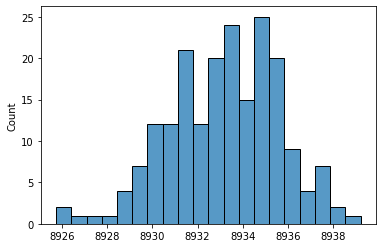

In [43]:
## Bootstrapping for 0-17 population
sample_means_0_17, n = [], 5000000
for reps in range(200):
  bootstrapped_sample = np.random.choice(trns[trns['Age'] == '0-17']['Purchase'], size=n) 
  bootstrapped_mean = np.mean(bootstrapped_sample)
  sample_means_0_17.append(bootstrapped_mean)
sns.histplot(sample_means_0_17, bins=20)

<AxesSubplot:ylabel='Count'>

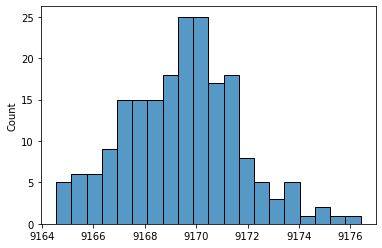

In [44]:
## Bootstrapping for 18-25 population
sample_means_18_25, n = [], 5000000
for reps in range(200):
  bootstrapped_sample = np.random.choice(trns[trns['Age'] == '18-25']['Purchase'], size=n) 
  bootstrapped_mean = np.mean(bootstrapped_sample)
  sample_means_18_25.append(bootstrapped_mean)
sns.histplot(sample_means_18_25, bins=20)

<AxesSubplot:ylabel='Count'>

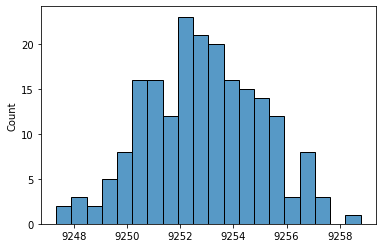

In [45]:
## Bootstrapping for 26_35 population
sample_means_26_35, n = [], 5000000
for reps in range(200):
  bootstrapped_sample = np.random.choice(trns[trns['Age'] == '26-35']['Purchase'], size=n) 
  bootstrapped_mean = np.mean(bootstrapped_sample)
  sample_means_26_35.append(bootstrapped_mean)
sns.histplot(sample_means_26_35, bins=20)

<AxesSubplot:ylabel='Count'>

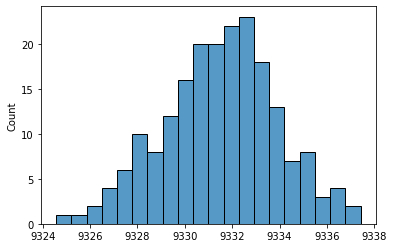

In [46]:
## Bootstrapping for 36_45 population
sample_means_36_45, n = [], 5000000
for reps in range(200):
  bootstrapped_sample = np.random.choice(trns[trns['Age'] == '36-45']['Purchase'], size=n) 
  bootstrapped_mean = np.mean(bootstrapped_sample)
  sample_means_36_45.append(bootstrapped_mean)
sns.histplot(sample_means_36_45, bins=20)

<AxesSubplot:ylabel='Count'>

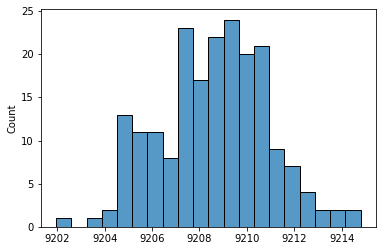

In [47]:
## Bootstrapping for 46_50 population
sample_means_46_50, n = [], 5000000
for reps in range(200):
  bootstrapped_sample = np.random.choice(trns[trns['Age'] == '46-50']['Purchase'], size=n) 
  bootstrapped_mean = np.mean(bootstrapped_sample)
  sample_means_46_50.append(bootstrapped_mean)
sns.histplot(sample_means_46_50, bins=20)

<AxesSubplot:ylabel='Count'>

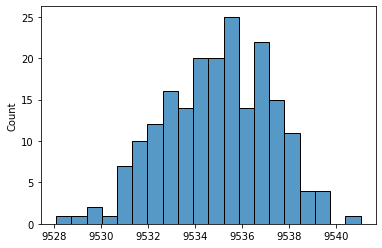

In [48]:
## Bootstrapping for 51_55 population
sample_means_51_55, n = [], 5000000
for reps in range(200):
  bootstrapped_sample = np.random.choice(trns[trns['Age'] == '51-55']['Purchase'], size=n) 
  bootstrapped_mean = np.mean(bootstrapped_sample)
  sample_means_51_55.append(bootstrapped_mean)
sns.histplot(sample_means_51_55, bins=20)

<AxesSubplot:ylabel='Count'>

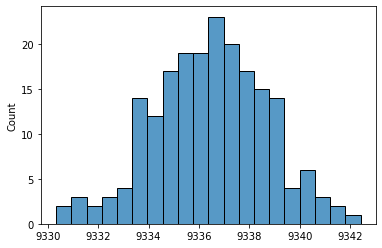

In [52]:
## Bootstrapping for 55+ population
sample_means_55_plus, n = [], 5000000
for reps in range(200):
  bootstrapped_sample = np.random.choice(trns[trns['Age'] == '55+']['Purchase'], size=n) 
  bootstrapped_mean = np.mean(bootstrapped_sample)
  sample_means_55_plus.append(bootstrapped_mean)
sns.histplot(sample_means_55_plus, bins=20)

## 95% confidence intervals for all age intervals

In [51]:
print("0-17 - ",np.round(np.percentile(sample_means_0_17, [2.5, 97.5]))) 
print("18-25 - ",np.round(np.percentile(sample_means_18_25, [2.5, 97.5]))) 
print("26-35 - ",np.round(np.percentile(sample_means_26_35, [2.5, 97.5]))) 
print("36-45 - ",np.round(np.percentile(sample_means_36_45, [2.5, 97.5]))) 
print("46-50 - ",np.round(np.percentile(sample_means_46_50, [2.5, 97.5]))) 
print("51-55 - ",np.round(np.percentile(sample_means_51_55, [2.5, 97.5]))) 
print("55+ - ",np.round(np.percentile(sample_means_55_plus, [2.5, 97.5]))) 

0-17 -  [8929. 8937.]
18-25 -  [9165. 9174.]
26-35 -  [9249. 9257.]
36-45 -  [9327. 9336.]
46-50 -  [9205. 9213.]
51-55 -  [9531. 9539.]
55+ -  [9332. 9341.]


## 99% confidence intervals for all age intervals

In [53]:
print("0-17 - ",np.round(np.percentile(sample_means_0_17, [0.5, 99.5]))) 
print("18-25 - ",np.round(np.percentile(sample_means_18_25, [0.5, 99.5]))) 
print("26-35 - ",np.round(np.percentile(sample_means_26_35, [0.5, 99.5]))) 
print("36-45 - ",np.round(np.percentile(sample_means_36_45, [0.5, 99.5]))) 
print("46-50 - ",np.round(np.percentile(sample_means_46_50, [0.5, 99.5]))) 
print("51-55 - ",np.round(np.percentile(sample_means_51_55, [0.5, 99.5]))) 
print("55+ - ",np.round(np.percentile(sample_means_55_plus, [0.5, 99.5]))) 

0-17 -  [8926. 8938.]
18-25 -  [9165. 9175.]
26-35 -  [9247. 9257.]
36-45 -  [9325. 9337.]
46-50 -  [9203. 9215.]
51-55 -  [9529. 9540.]
55+ -  [9331. 9342.]


### Hence, we can say with 99% confidence that the highest spenders in descending order are 
    1. 51-55 years old
    2. 36-45 years old / 55+ years old
    3. 18-25 years old
    4. 46-50 years old
    5. 18-25 years old
    6. 0-17 years old

### Actionable recommendations - 
    1. Old people tend to spend more than others, hence products specific to old people can be placed and priced strategically to cater them well and increase sales from them.
    2. Males tend to spend more than others, hence products specific to old people can be placed and priced strategically to cater them well and increase sales from them.